In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score

In [2]:
X_train = pd.read_csv('agg_Xtrain.csv')
X_test = pd.read_csv('agg_Xtest.csv')
y_train = pd.read_csv('agg_ytrain.csv')
y_test = pd.read_csv('agg_ytest.csv')

In [3]:
X_train = X_train.set_index('Unnamed: 0')
X_test = X_test.set_index('Unnamed: 0')
y_train = y_train.set_index('Unnamed: 0')
y_test = y_test.set_index('Unnamed: 0')

In [13]:
tscv = TimeSeriesSplit(n_splits=5)
params = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 'max_depth': list(range(1, 24)), 'max_leaf_nodes': [i for i in range(1,151) if i%10==0], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'random_state': [10, 20, 30, 40, 50]}
dec_tree = DecisionTreeClassifier()
grid_search_cv = GridSearchCV(dec_tree, params, cv=tscv)

In [14]:
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

KeyboardInterrupt: 

In [10]:
dec_tree_parms = dec_tree.set_params(**grid_search_cv.best_params_)
dec_tree_parms

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=10,
                       min_samples_split=7, random_state=30, splitter='random')

In [11]:
dec_tree_parms.fit(X_train,y_train)
pred = dec_tree_parms.predict(X_test)
f1 = f1_score(y_test, pred, average='micro')
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred, average='micro')

print(f"precision: {precision}, recall: {recall}, f1score: {f1}")

precision: 0.3233082706766917, recall: 0.3233082706766917, f1score: 0.3233082706766917


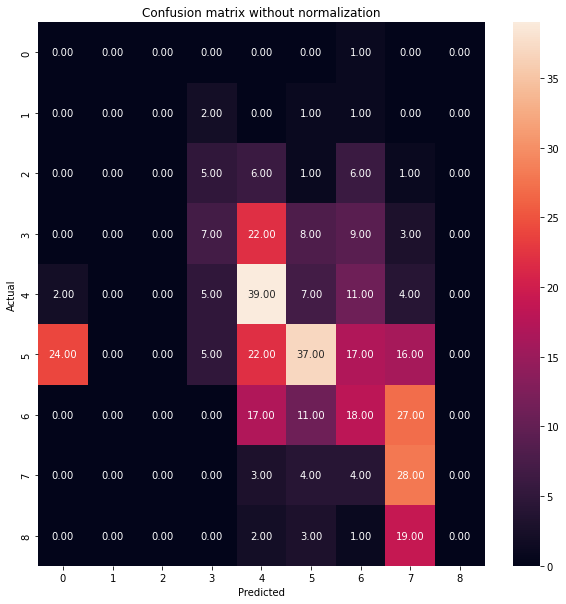

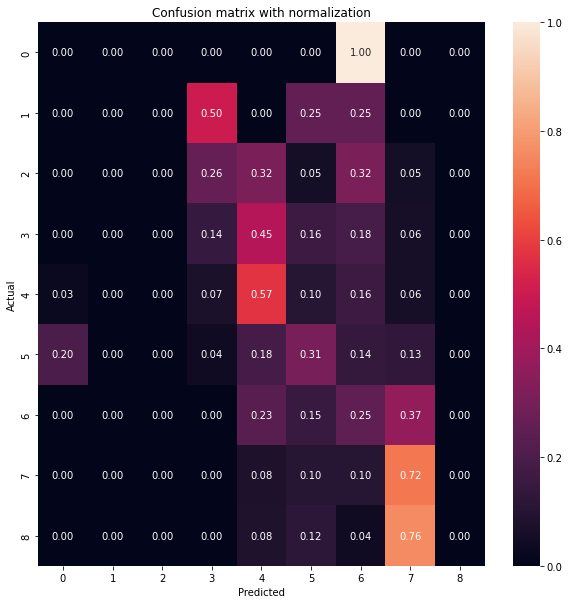

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


matrix = confusion_matrix(y_test, pred)
matrix_normalized = confusion_matrix(y_test, pred, normalize='true')

fig1, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='.2f')
plt.title('Confusion matrix without normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')

fig2, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_normalized, annot=True, fmt='.2f')
plt.title('Confusion matrix with normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

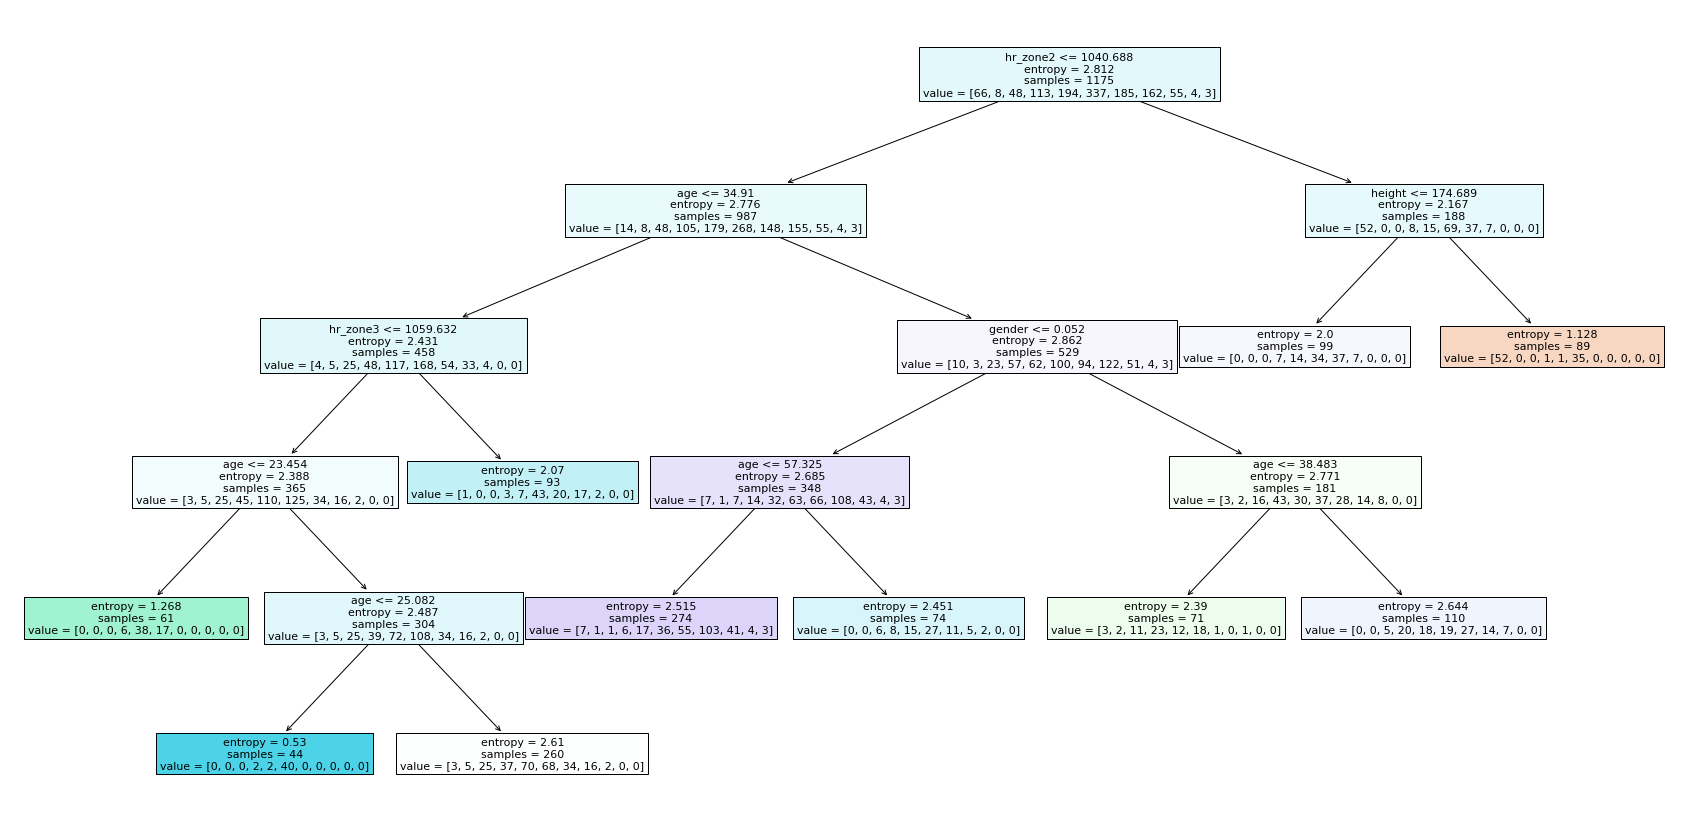

In [12]:
from sklearn import tree
plt.figure(figsize=(30,15))

tree.plot_tree(dec_tree,
              feature_names=X_train.columns,
              filled=True,
              fontsize=11);